# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
hr=pd.read_csv("Health_insurance.csv")
print(hr)

      age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1338 rows x 8 columns]


In [6]:
hr.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
hr.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [9]:
hr.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [12]:
hr.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [15]:
hr.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [16]:
print(hr['insuranceclaim'].value_counts())

1    783
0    555
Name: insuranceclaim, dtype: int64


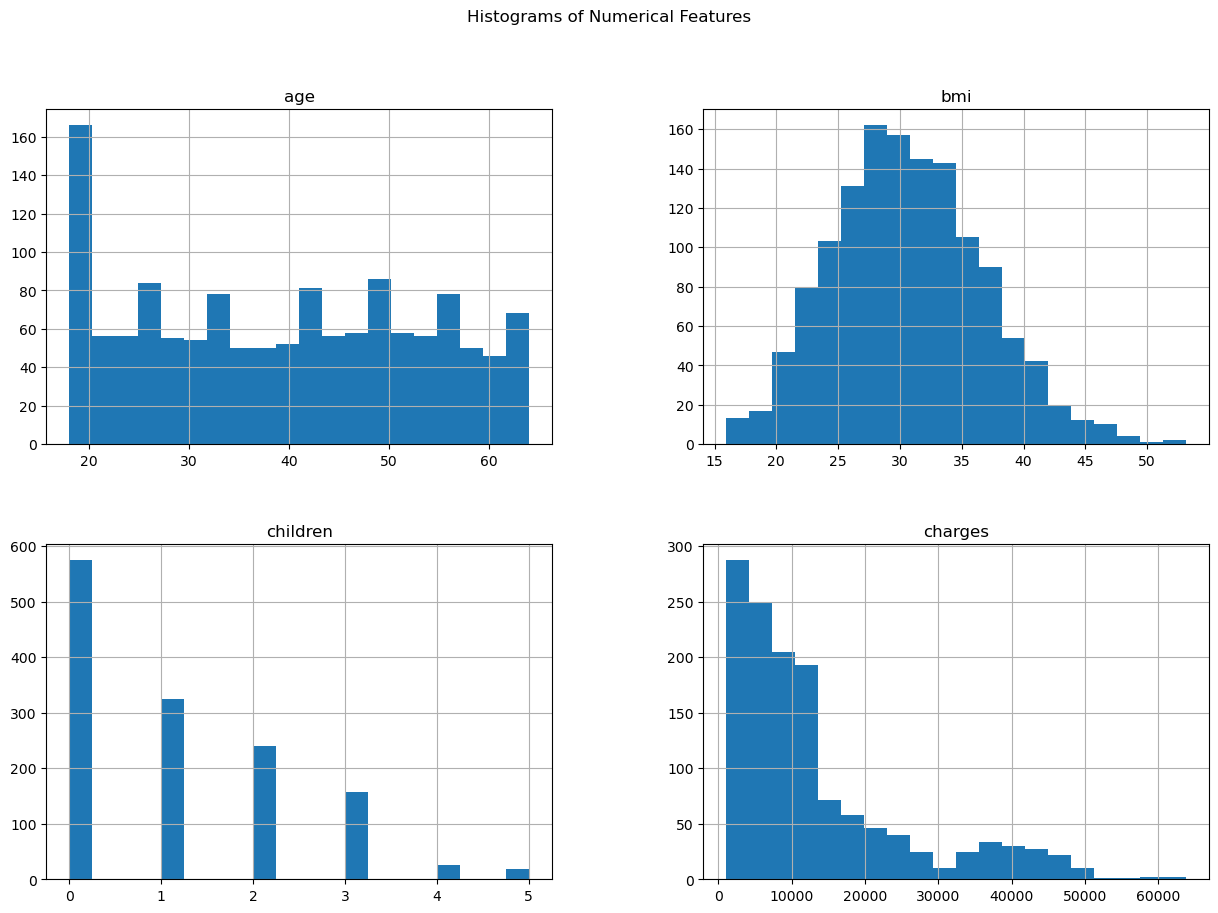

In [19]:
# Distribution of numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
hr[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [21]:
import seaborn as sns

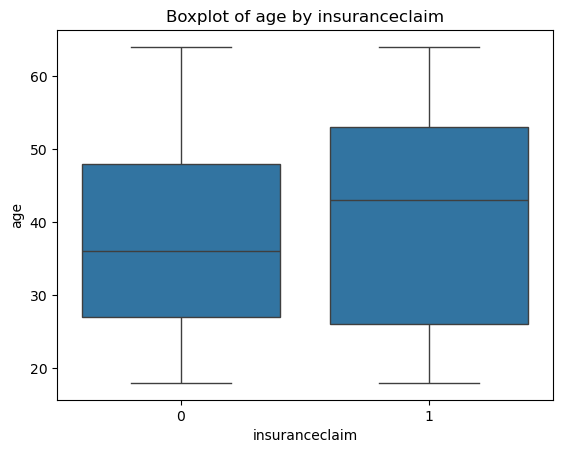

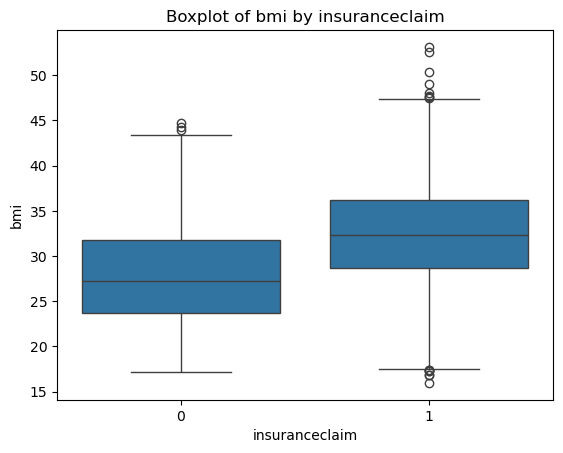

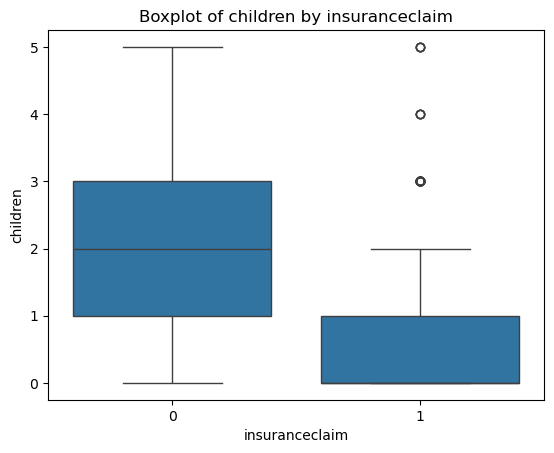

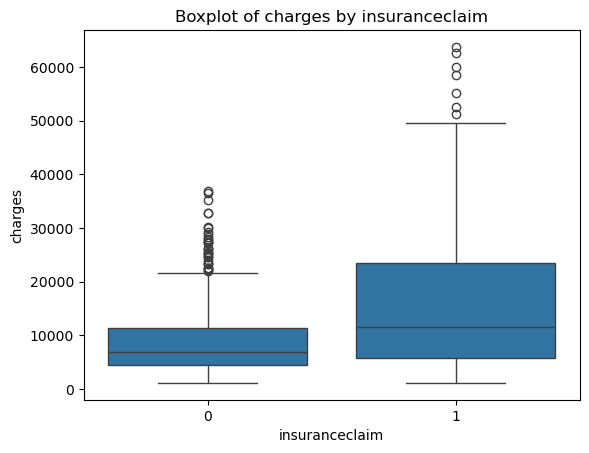

In [23]:
# Box plots for numerical features
for feature in numerical_features:
    sns.boxplot(x='insuranceclaim', y=feature, data=hr)
    plt.title(f'Boxplot of {feature} by insuranceclaim')
    plt.show()

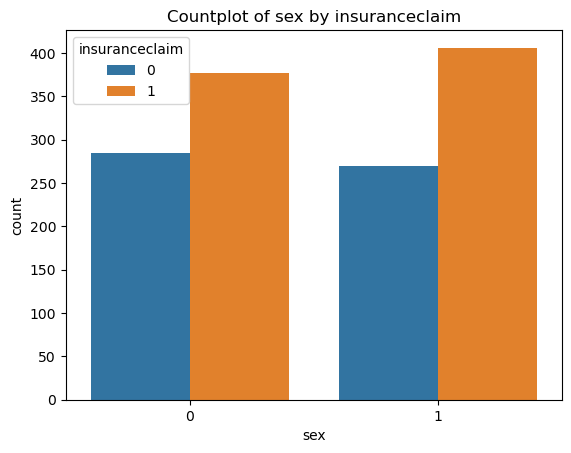

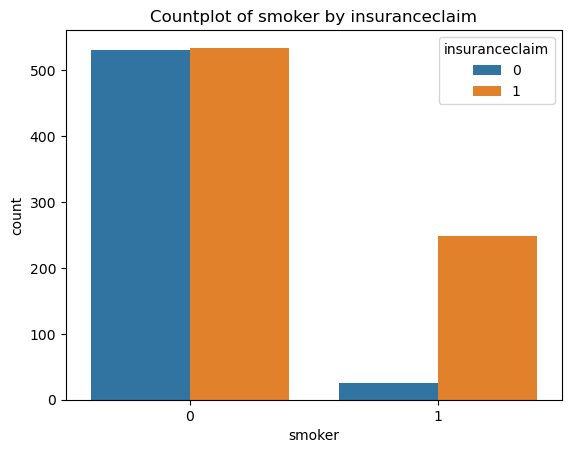

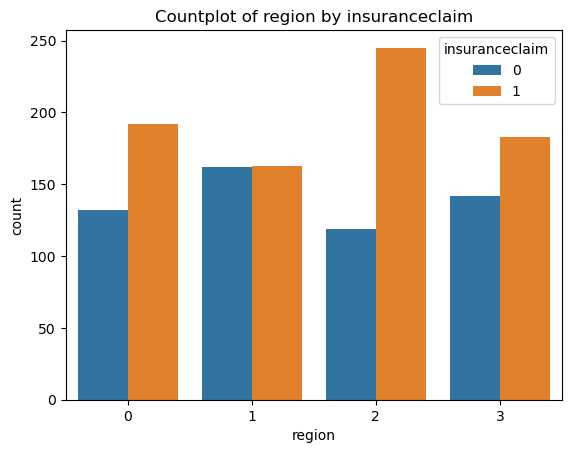

In [24]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    sns.countplot(x=feature, hue='insuranceclaim', data=hr)
    plt.title(f'Countplot of {feature} by insuranceclaim')
    plt.show()

# Data Preprocessing

In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
# Handling missing values
numeric_features = ['age', 'bmi', 'children', 'charges']
categorical_features = ['sex', 'smoker', 'region']

In [8]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [9]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
X_preprocessed = preprocessor.fit_transform(hr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [13]:
# Manually get feature names after preprocessing
numeric_feature_names = numeric_features
categorical_feature_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
feature_names = numeric_feature_names + categorical_feature_names

In [14]:
# Display the preprocessed features (optional)
preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)
print(preprocessed_df.head())

        age       bmi  children   charges  sex_0  sex_1  smoker_0  smoker_1  \
0 -1.438764 -0.453320 -0.908614  0.298584    1.0    0.0       0.0       1.0   
1 -1.509965  0.509621 -0.078767 -0.953689    0.0    1.0       1.0       0.0   
2 -0.797954  0.383307  1.580926 -0.728675    0.0    1.0       1.0       0.0   
3 -0.441948 -1.305531 -0.908614  0.719843    0.0    1.0       1.0       0.0   
4 -0.513149 -0.292556 -0.908614 -0.776802    0.0    1.0       1.0       0.0   

   region_0  region_1  region_2  region_3  
0       0.0       0.0       0.0       1.0  
1       0.0       0.0       1.0       0.0  
2       0.0       0.0       1.0       0.0  
3       0.0       1.0       0.0       0.0  
4       0.0       1.0       0.0       0.0  


# Feature Engineering

In [21]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [29]:
# Feature engineering
interaction_features = ['age', 'bmi', 'children']

interaction_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('interaction', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())
])

In [31]:
# Apply feature engineering to the selected features
X_interaction = interaction_transformer.fit_transform(hr[interaction_features])
interaction_feature_names = interaction_transformer.named_steps['interaction'].get_feature_names_out(interaction_features)
X_interaction_df = pd.DataFrame(X_interaction, columns=interaction_feature_names)

In [33]:
# Concatenate the new features with the original dataset
data_with_interaction = pd.concat([hr, X_interaction_df], axis=1)

In [34]:
# Rename the new features to ensure uniqueness
data_with_interaction.columns = [f"feat_{col}" if col in interaction_feature_names else col for col in data_with_interaction.columns]

In [35]:
# Display the dataset with new features (optional)
print(data_with_interaction.head())

   feat_age  sex  feat_bmi  feat_children  smoker  region      charges  \
0        19    0    27.900              0       1       3  16884.92400   
1        18    1    33.770              1       0       2   1725.55230   
2        28    1    33.000              3       0       2   4449.46200   
3        33    1    22.705              0       0       1  21984.47061   
4        32    1    28.880              0       0       1   3866.85520   

   insuranceclaim  feat_age  feat_bmi  feat_children  feat_age bmi  \
0               1 -1.438764 -0.453320      -0.908614     -1.304476   
1               1 -1.509965  0.509621      -0.078767     -1.155629   
2               0 -0.797954  0.383307       1.580926     -0.550476   
3               0 -0.441948 -1.305531      -0.908614     -0.884952   
4               1 -0.513149 -0.292556      -0.908614     -0.550170   

   feat_age children  feat_bmi children  
0          -0.846856          -0.880362  
1          -0.497615           0.002677  
2       

# Model Training

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [49]:

# Split the data into features and target variable
X = hr[['age', 'bmi', 'children', 'smoker', 'region']]
y = hr['insuranceclaim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', gradient_boosting_model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy on test set: {accuracy}")
print("Classification Report:\n", report)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Accuracy on test set: 0.9664179104477612
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.97      0.97      0.97       161

    accuracy                           0.97       268
   macro avg       0.96      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



# Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you already have the trained model and the test set (X_test, y_test)
# If not, please adjust accordingly

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9664
Precision: 0.9750
Recall: 0.9689
F1 Score: 0.9720
Confusion Matrix:
[[103   4]
 [  5 156]]


# Model Interpretation

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you already have the trained model and the test set (X_test, y_test)
# If not, please adjust accordingly

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9664
Precision: 0.9750
Recall: 0.9689
F1 Score: 0.9720
Confusion Matrix:
[[103   4]
 [  5 156]]
